In [21]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#loading in list of all RRNA, 
rrna_genes_list=pd.read_csv('allRrna.csv', sep=',', usecols=['id_with_url'], squeeze=True).tolist() #1106 rrnas
all_counts = pd.read_csv('all_salmon_quant_norm.csv') #main counts file from salmon
column_names = all_counts.drop('gene_id', 1) # name of all the samples in a list
polya_columns = pd.read_csv('polyseq.csv', sep=',', squeeze=True).tolist() # name of of the polyA samples 
ribo_columns = column_names.columns.difference(polya_columns) # name of all the ribo-samples


#Creating a sliced row to compare the Ensemble ids
all_counts['Sliced_Ids'] = all_counts.gene_id.str[:15]


rrna_ids= all_counts[all_counts['Sliced_Ids'].isin(rrna_genes_list)] #462
non_rrna_ids= all_counts[~all_counts['Sliced_Ids'].isin(rrna_genes_list)] #35683



#polyA counts creating lists
polya_total_counts = all_counts.loc[range(len(all_counts)),polya_columns].sum().tolist()
polya_rrna_counts = rrna_ids.loc[range(len(all_counts)),polya_columns].sum().tolist()
polya_non_rrna_counts = non_rrna_ids.loc[range(len(all_counts)),polya_columns].sum().tolist()

#converting lists to numpy arrays so I can divide the arrays together
polya_total_reads_array= np.array(polya_total_counts, dtype=np.float)
polya_rrna_reads_array= np.array(polya_rrna_counts, dtype=np.float)
polya_non_rrna_array= np.array(polya_non_rrna_counts, dtype=np.float)

#dividing the summed counts
poly_norm = polya_rrna_reads_array/polya_non_rrna_array #rrna/total-rrna
poly_total = polya_rrna_reads_array/polya_total_reads_array #rrna/totalsum




#riboDcounts creating lists
ribod_total_counts = all_counts.loc[range(len(all_counts)),ribo_columns].sum().tolist()
ribod_rrna_counts = rrna_ids.loc[range(len(all_counts)),ribo_columns].sum(axis=0).tolist()
ribod_non_rrna_counts= non_rrna_ids.loc[range(len(all_counts)),ribo_columns].sum(axis=0).tolist()

#converting lists to numpy arrays so I can divide the arrays together
ribod_total_reads_array= np.array(ribod_total_counts, dtype=np.float)
ribod_rrna_reads_array= np.array(ribod_rrna_counts, dtype=np.float)
ribod_non_rrna_array= np.array(ribod_non_rrna_counts, dtype=np.float)

#dividing the summed counts
ribod_norm = ribod_rrna_reads_array/ribod_non_rrna_array #rrna/total-rrna
ribod_total = ribod_rrna_reads_array/ribod_total_reads_array #rrna/totalsum

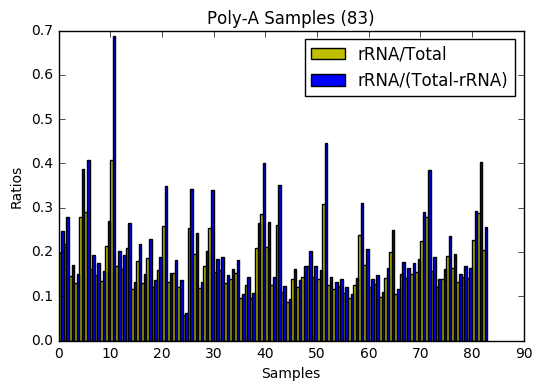

In [23]:
N = 83 #number of samples
ypoly_total= poly_total #=rrna/total
ypoly_norm = poly_norm #rrna/norm-rrna

ind = np.arange(N)  # the x locations for the groups
width = .5       # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind, ypoly_total, width, color='y')


rects2 = ax.bar(ind + width, ypoly_norm, width, color='b')

# Adding labels
ax.set_ylabel('Ratios')
ax.set_xlabel('Samples')
ax.set_title('Poly-A Samples (83)')
ax.legend((rects1[0], rects2[0]), ('rRNA/Total', 'rRNA/(Total-rRNA)'))

plt.show()

In [24]:
print('Mean of rRNA/Norm ', poly_total.mean())
print()
print('Mean of rRNA/Total-rRNA', poly_norm.mean())


Mean of rRNA/Norm  0.167078847048

Mean of rRNA/Total-rRNA 0.207652452107


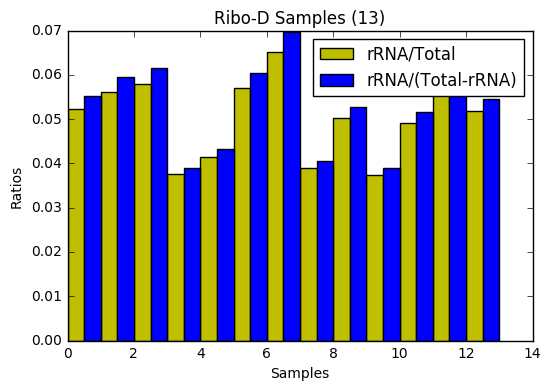

In [25]:
N = 13 #number of samples
yribo_total= ribod_total #rrna/total
yribo_norm = ribod_norm #rrna/norm-rrna

ind = np.arange(N)  # the x locations for the groups
width = .5       # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind, yribo_total, width, color='y')


rects2 = ax.bar(ind + width, yribo_norm, width, color='b')

# Adding labels
ax.set_ylabel('Ratios')
ax.set_xlabel('Samples')
ax.set_title('Ribo-D Samples (13)')
ax.legend((rects1[0], rects2[0]), ('rRNA/Total', 'rRNA/(Total-rRNA)'))

plt.show()

In [26]:
print('Mean of rRNA/Norm ', ribod_total.mean())
print()
print('Mean of rRNA/Total-rRNA ', ribod_norm.mean())

Mean of rRNA/Norm  0.0502042915504

Mean of rRNA/Total-rRNA  0.0529433106398
